In [1]:
# example of gathering, reading, and plotting data
# developed by FBB for PUI in 2018
# uses NYC data portal NYC OPEN DATA https://data.cityofnewyork.us/

In [2]:
from __future__ import print_function #for compatibility beteen python2 and python3

# all other needed modules will be imported as they are needed. 
# I will leave them in the cell where they become relevant BUT  
# PEP8 standards require to move them at the top cell, 
# so you must move your imports in this cell for the homework

# Find data on the portal

 using DHS data on shelter population
 obtained with the following steps from the website 
 
 https://opendata.cityofnewyork.us/ -> Data 
 
 https://opendata.cityofnewyork.us/data/ -> Department of Homeless Services (DHS) (in data by agency)
 
 https://data.cityofnewyork.us/browse?Dataset-Information_Agency=Department+of+Homeless+Services+%28DHS%29
 -> DHS daily report
 
 https://data.cityofnewyork.us/Social-Services/DHS-Daily-Report/k46n-sa2m -> View Data 
 
 https://data.cityofnewyork.us/Social-Services/DHS-Daily-Report/k46n-sa2m/data -> Export
 
 this gives me various links. I copy and paste below the CSV link

# solution 1: download from the portal 


In [3]:
#!curl https://data.cityofnewyork.us/api/views/k46n-sa2m/rows.csv?accessType=DOWNLOAD > dhsdaily.csv

In [4]:
# ove the downloaded data to PUI data
import os
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/um367/PUIdata


In [5]:
#create the env variable if missing
#os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

#print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/fb55/PUIdata


In [6]:
# move the data
!mv dhsdaily.csv $PUIDATA

In [2]:
#test if the data is there
!ls $PUIDATA

dhsdaily.csv
FY16_MMR_Spending_and_Budget_Information_by_Units_of_Appropriation.csv


## read in the data with pandas

In [5]:
#read in the data with pandas
import pandas as pd
dhs = pd.read_csv("%s/FY16_MMR_Spending_and_Budget_Information_by_Units_of_Appropriation.csv"%os.getenv("PUIDATA"))

In [50]:
#print the fist 8 lines out
dhs.head(7)

,Agy,Agy_Name,UA,UA_Name,PS_OTPS_Ind,FY_15_Exp,FY_16_Adopted
0,3,BOARD OF ELECTIONS,1,PERSONAL SERVICES,Personal Services,51391433,61723539
1,3,BOARD OF ELECTIONS,2,OTHER THAN PERSONAL SERVICES,Other Than Personal Services,55363698,78528690
2,17,DEPARTMENT OF EMERGENCY MANAGEMENT,1,PERSONAL SERVICES,Personal Services,11601381,6246590
3,17,DEPARTMENT OF EMERGENCY MANAGEMENT,2,OTHER THAN PERSONAL SERVICES,Other Than Personal Services,23436956,9780548
4,25,LAW DEPARTMENT,1,PERSONAL SERVICES,Personal Services,111055572,125701262
5,25,LAW DEPARTMENT,2,OTHER THAN PERSONAL SERVICES,Other Than Personal Services,64534069,60879415
6,30,DEPARTMENT OF CITY PLANNING,1,PERSONAL SERVICES,Personal Services,19223316,22966676


In [7]:
#print the last 3 lines out
dhs.tail(3)

,Agy,Agy_Name,UA,UA_Name,PS_OTPS_Ind,FY_15_Exp,FY_16_Adopted
266,866,DEPARTMENT OF CONSUMER AFFAIRS,2,LICENSING/ENFORCEMENT,Personal Services,12848238,16143660
267,866,DEPARTMENT OF CONSUMER AFFAIRS,4,ADJUDICATION,Personal Services,2450671,3349985
268,866,DEPARTMENT OF CONSUMER AFFAIRS,3,OTHER THAN PERSONAL SERVICE,Other Than Personal Services,15133071,14974494


In [8]:
#look at the columns available, those are the variables
dhs.columns

Index([u'Agy', u'Agy_Name', u'UA', u'UA_Name', u'PS_OTPS_Ind', u'FY_15_Exp',
       u'FY_16_Adopted'],
      dtype='object')

In [9]:
#count how many rows, those are the data points
dhs.size

1883

In [10]:
#select 2 columns only for plotting
dhs_2c = dhs[['FY_15_Exp', 'FY_16_Adopted']]

In [11]:
dhs_2c.head()

,FY_15_Exp,FY_16_Adopted
0,51391433,61723539
1,55363698,78528690
2,11601381,6246590
3,23436956,9780548
4,111055572,125701262


## plot the data

In [12]:
dhs_2c.plot(x="FY_15_Exp", y="FY_16_Adopted")

In [13]:
# wont show anything if i do not use the magic command to show plots in the notebook 
#(or use pl.show to pop up a window, but for the homework plots have to be embedded)

In [14]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


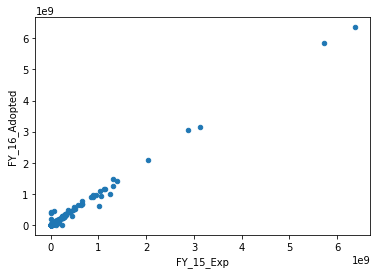

In [15]:
dhs_2c.plot(x="FY_15_Exp", y="FY_16_Adopted", kind='scatter');
# every plot needs a caption that explains to the reader 
# 1) WHAT what the reader is loooking at and 
# 2) WHY why the reader is looking at it here in the analysis 
#      (in this case there is no why cause this plot is not part of an analysis)
# 3) TAKE HOME what is the take home point for the plot in the analysis 
#      (also there is no take home point here cause we are not doind an analysis but you can point out interesting features)

Figure 1: Fiscal year adopted performance indicator for 2016 is plotted against fiscal year expected for 2015. It can be noted that two variables display a nearly perfect corelation.

# solution 2: Use API and download a json file

from the dataset export link now go to -> SODA API and the the endpoint

In [36]:
url = "https://data.cityofnewyork.us/resource/4qxi-jgbe.json"

In [37]:
#use the appropriatepandas function to read in the json file
df = pd.read_json(url)

In [38]:
# print it out
df.head(3)

,agency_name,agency_start_date,base_salary,first_name,fiscal_year,last_name,leave_status_as_of_july_31,mid_init,ot_hours,pay_basis,regular_gross_paid,regular_hours,title_description,total_ot_paid,total_other_pay,work_location_borough
0,DISTRICT ATTORNEY-MANHATTAN,2003-07-14T00:00:00.000,47678.0,RAHASHEEM,2016,ABA'AHMID,ACTIVE,E,2.25,per Annum,47166.03,1830.00,COMMUNITY ASSOCIATE ...,57.28,0.0,MANHATTAN
1,DISTRICT ATTORNEY-MANHATTAN,1995-06-12T00:00:00.000,119959.0,MARGARET,2016,ABENSUR,ACTIVE,NaN,0.00,per Annum,119042.50,1831.00,ADMINISTRATIVE ACCOUNTANT ...,0.00,0.0,MANHATTAN
2,DISTRICT ATTORNEY-MANHATTAN,2011-10-11T00:00:00.000,39966.0,ANDREA,2016,ABOUNAOUM,ON LEAVE,L,1.00,per Annum,27452.62,1181.68,COMMUNITY ASSOCIATE ...,21.34,33.0,MANHATTAN


In [39]:
#now select a date and 2 variables
dhs_3c = df[['agency_start_date', 'base_salary', 'regular_gross_paid']]

for consistency with the data above, I will change the names of the columns (variables) to be the same as before. This way the plots will come out with the same labels and legends

In [40]:
dhs_3c.rename(columns = {'agency_start_date':'Agency Start Date', 
               'base_salary':'Base Salary', 
               'regular_gross_paid': 'Regular Gross Paid'}, inplace=True)

In [23]:
dhs_3c.head()

,Agency Start Date,Base Salary,Regular Gross Paid
0,2003-07-14T00:00:00.000,47678.0,47166.03
1,1995-06-12T00:00:00.000,119959.0,119042.50
2,2011-10-11T00:00:00.000,39966.0,27452.62
3,2014-12-01T00:00:00.000,116000.0,115104.57
4,2015-05-21T00:00:00.000,1.0,3500.00


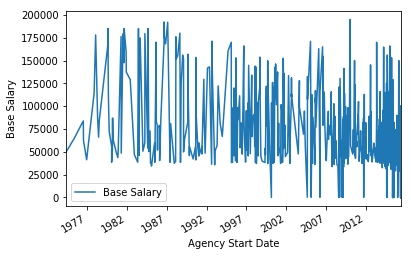

In [48]:
#as a default this plot wont have a y label, but all plots must have axis labels!
ax = dhs_3c.plot(x='Agency Start Date', y='Base Salary');
ax.set_ylabel("Base Salary");

i do not like the formatting of those dates so I will drom the timestamp overwriting the original column. 
for more info on baisc timestamp manipulation 
( no capation cause I am remaking this figure)

In [42]:
dhs_3c['Agency Start Date'] = dhs_3c['Agency Start Date'].apply(lambda x: pd.Timestamp(x))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


now that I am using timestamps (instead of strings as the data got read in form the json file) Pandas know to rotate the labels appropriately so I can drop rot=90

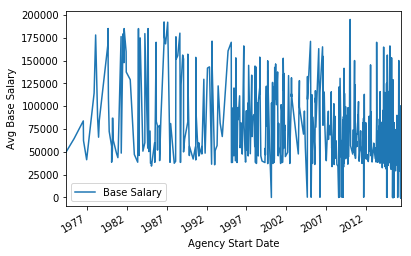

In [43]:
ax = dhs_3c.plot(x='Agency Start Date', y='Base Salary')
ax.set_ylabel("Avg Base Salary");

Figure 2: This figure shows how the base salray varies with the start date of the agency. For most it looks like a random noise signal but there is a slight negative trend as time increases. Furthermore, the frequency of the signal increases showing that more agencies came into being in the later times. Finaly, it can also be observed that amplitude (which can be interpretted as variance in this case) decreases till 2012 and starts to increase again after that.

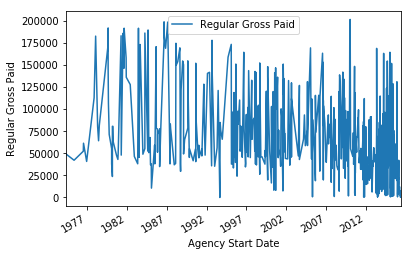

In [47]:
#plot the other columns
ax = dhs_3c.plot(x='Agency Start Date', y='Regular Gross Paid')
ax.set_ylabel("Regular Gross Paid");

Figure 3: Figure shows the variation of Regular Gross Paid with the Agency start time. There is a slight decreasing trend and variance also tends to decease till 2012 before increasing again. More agencies are started every year with increasing year. The trend is very similar to the trend of base salary!

In [49]:
dhs_3c.corr()

,Base Salary,Regular Gross Paid
Base Salary,1.000000,0.905104
Regular Gross Paid,0.905104,1.000000


As suspected Base Salary has strong correlation with Regular Gross Paid